In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.anova import AnovaRM

In [2]:
df = pd.read_csv('water-training.csv')

In [6]:
# Basic Descriptive Statistics
df.describe(include='all')

,Site_Id,Unit_Id,Read_Date,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),Air Temp-Celsius,Air Temp (?F),Time (24:00),Field_Tech,DateVerified,WhoVerified,AirTemp (C),Year
count,2370,32,2366,2241.000000,1520.000000,2276.000000,2298.000000,2300.000000,2250.000000,85.000000,2300.000000,2308,2332,453,453,2371.000000,2371.000000
unique,6,2,801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99,14,44,12,NaN,NaN
top,Bay,01csv,4/4/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0:00,Not Recorded,10/30/2019,Christine Folks,NaN,NaN
freq,794,28,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1440,1225,60,171,NaN,NaN
mean,NaN,NaN,NaN,0.717068,6.646263,7.168212,0.524898,0.762559,18.062138,16.437647,62.051637,NaN,NaN,NaN,NaN,15.663050,2006.049346
std,NaN,NaN,NaN,1.230819,2.506608,0.788485,0.473663,0.621140,8.298246,11.754138,15.492236,NaN,NaN,NaN,NaN,10.314720,9.002373
min,NaN,NaN,NaN,0.000000,0.000000,0.300000,0.000000,0.010000,0.000000,0.000000,10.500000,NaN,NaN,NaN,NaN,-17.777778,1899.000000
25%,NaN,NaN,NaN,0.000000,4.800000,6.500000,0.300000,0.400000,11.000000,9.000000,49.000000,NaN,NaN,NaN,NaN,8.888889,2001.000000
50%,NaN,NaN,NaN,0.000000,6.500000,7.000000,0.400000,0.650000,19.000000,15.000000,63.000000,NaN,NaN,NaN,NaN,16.666667,2007.000000
75%,NaN,NaN,NaN,1.000000,8.500000,7.500000,0.650000,0.950000,25.000000,21.700000,75.000000,NaN,NaN,NaN,NaN,23.888889,2012.000000


In [15]:
if df.select_dtypes(include=['object', 'bool']).any().any():
    for col in df.select_dtypes(include=['object', 'bool']).columns:
        print(f"\nFrequency distribution for {col}:")
        print(df[col].value_counts())


Frequency distribution for Site_Id:
Site_Id
Bay    794
D      440
B      437
A      434
C      264
d        1
Name: count, dtype: int64

Frequency distribution for Unit_Id:
Unit_Id
01csv    28
01CSV     4
Name: count, dtype: int64

Frequency distribution for Read_Date:
Read_Date
4/4/2017     6
11/6/2001    5
8/17/2006    5
2/9/2006     5
3/9/2006     5
            ..
5/29/1995    1
6/5/1995     1
6/12/1995    1
6/19/1995    1
1/3/1994     1
Name: count, Length: 801, dtype: int64

Frequency distribution for Time (24:00):
Time (24:00)
0:00       1440
14:24        52
19:12        47
4:48         46
9:36         44
           ... 
13:26         1
19:40         1
0:02          1
11:35         1
5/23/19       1
Name: count, Length: 99, dtype: int64

Frequency distribution for Field_Tech:
Field_Tech
Not Recorded                1225
S. Poe                       358
Sue Poe                      342
Feldman                      172
Susan Poe                     86
J Phillips, Mary Feldman      

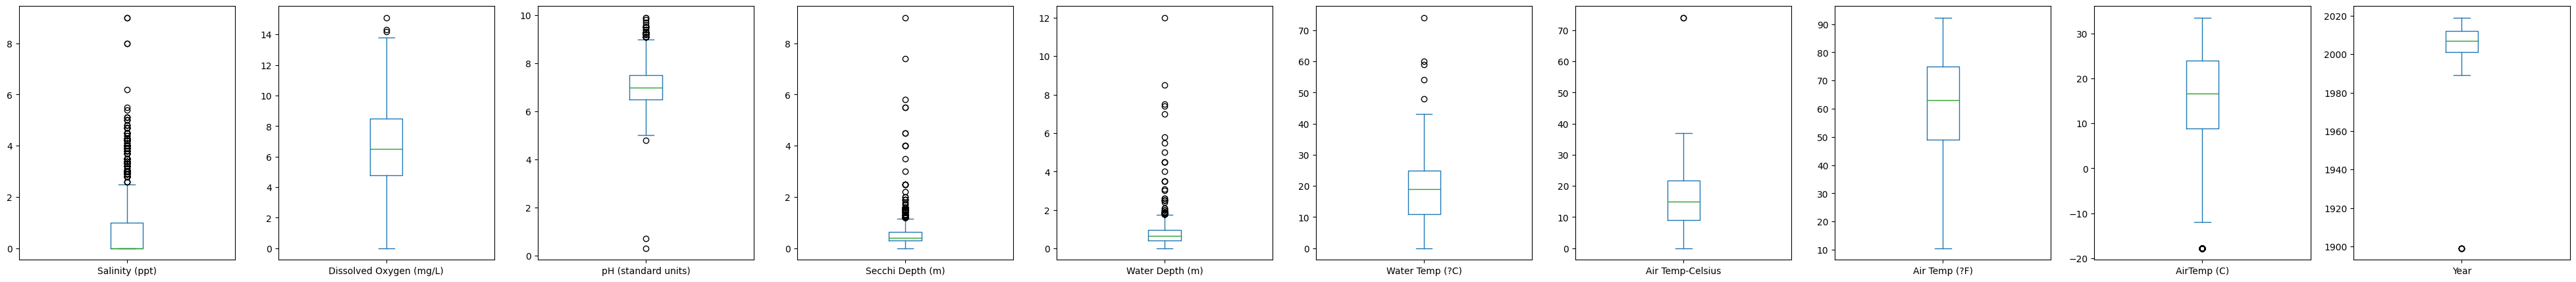

In [17]:
num_cols = df.select_dtypes(include=[np.number]).columns
if num_cols.any():
    df[num_cols].plot(kind='box', subplots=True, layout=(1,len(num_cols)), figsize=(len(num_cols)*5, 5))
    plt.show()

In [21]:
if num_cols.any():
    print("\nShapiro-Wilk Normality Test Results:")
    for col in num_cols:
        stat, p = stats.shapiro(df[col])
        print(f"{col}: Statistics={stat:.3f}, p-value={p:.3g}")


Shapiro-Wilk Normality Test Results:
Salinity (ppt): Statistics=nan, p-value=1
Dissolved Oxygen (mg/L): Statistics=nan, p-value=1
pH (standard units): Statistics=nan, p-value=1
Secchi Depth (m): Statistics=nan, p-value=1
Water Depth (m): Statistics=nan, p-value=1
Water Temp (?C): Statistics=nan, p-value=1
Air Temp-Celsius: Statistics=nan, p-value=1
Air Temp (?F): Statistics=nan, p-value=1
AirTemp (C): Statistics=0.924, p-value=5.04e-33
Year: Statistics=0.804, p-value=0


# Tests

In [27]:
independent = 'Salinity (ppt)'
dependent = 'Dissolved Oxygen (mg/L)'
group1 = df[df[independent] > 1][[dependent, independent]]
group2 = df[df[independent] <= 1][[dependent, independent]]

T-test: means of 2 groups, parametric

In [28]:
t_stat, p_val = stats.ttest_ind(group1, group2)
print("Independent t-test statistic:", t_stat, "P-value:", p_val)

#t_stat, p_val = stats.ttest_rel(before, after)
#print("Paired t-test statistic:", t_stat, "P-value:", p_val)

Independent t-test statistic: [        nan 83.22262113] P-value: [nan  0.]


ANOVA: means of 3+ independent groups, parametric

In [ ]:
f_stat, p_val = stats.f_oneway(group1, group2, group3)
print("ANOVA statistic:", f_stat, "P-value:", p_val)

Kruskal-Wallis Test: means of 3+ independent groups, non-parametric

In [ ]:
stat, p = kruskal(group1, group2, group3)
print("Kruskal-Wallis statistic:", stat, "P-value:", p)

rm_ANOVA: means of 3+ dependent groups, parametric

In [ ]:
aovrm = AnovaRM(data, 'Response', 'Subject', within=['Condition'])
fit = aovrm.fit()
print(fit.summary())

Friedman test: means of 3+ dependent groups, non-parametric

In [ ]:
stat, p = stats.friedmanchisquare(group1, group2, group3)
print("Friedman statistic:", stat, "P-value:", p)

Chi-Square Test: 2 categorical variables

In [ ]:
table = [[10, 20, 30], [6, 9, 17], [8, 10, 5]]
chi2, p, dof, expected = stats.chi2_contingency(table)
print("Chi-square test", "Statistic:", chi2, "P-value:", p)

Mann-Whitney U Test: 2 independent, non-parametric samples from same distribution

In [31]:
stat, p = stats.mannwhitneyu(group1, group2)
print("Mann-Whitney U statistic:", stat, "P-value:", p)

Mann-Whitney U statistic: [    nan 846560.] P-value: [nan  0.]


Wilcoxon Signed-Rank Test: 2 paired, non-parametric

In [ ]:
stat, p = stats.wilcoxon(data1, data2)
print("Wilcoxon statistic:", stat, "P-value:", p)

Fisher's Exact Test: 2*2 contingency table

In [32]:
oddsratio, p_value = stats.fisher_exact([[8, 2], [1, 5]])

print("Fisher's Exact Test", "Odds ratio:", oddsratio, "P-value:", p_value)

Fisher's Exact Test Odds ratio: 20.0 P-value: 0.034965034965034975
